# Jupyter notebook for plotting Figure 2 in "Conformal Validity Guarnatees Exist for Any Data Distribution" (ICML 2024)

Notebook by Drew Prinster (drew@cs.jhu.edu)

Last updated May 12th, 2024

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os


## Split CP Design Experiments Plotting

/tmp/ipykernel_831544/1539030956.py:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  split_cov = data[data['method']=='split'].groupby(['step']).mean()['coverage']
/tmp/ipykernel_831544/1539030956.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wsplit_cov_list.append(data[data['method']=='wsplit_' + str(i)].groupby(['step']).mean()['coverage'])
/tmp/ipykernel_831544/1539030956.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid fo

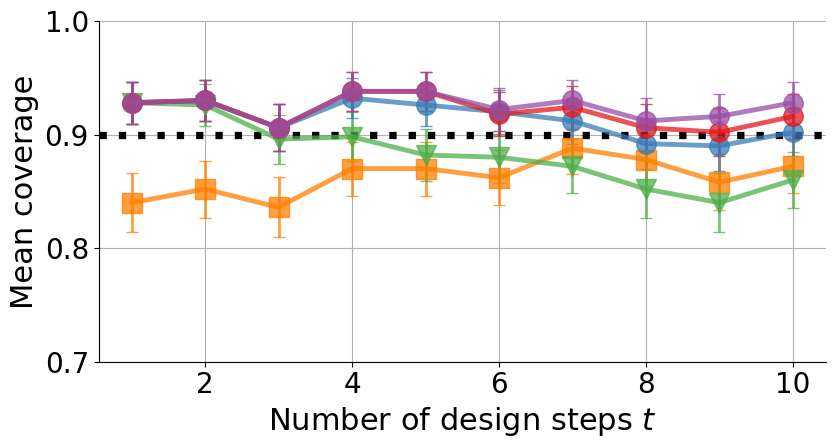

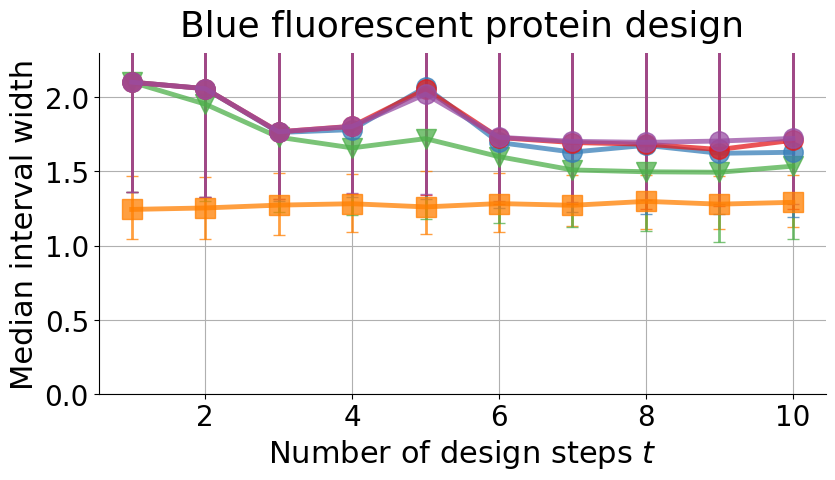

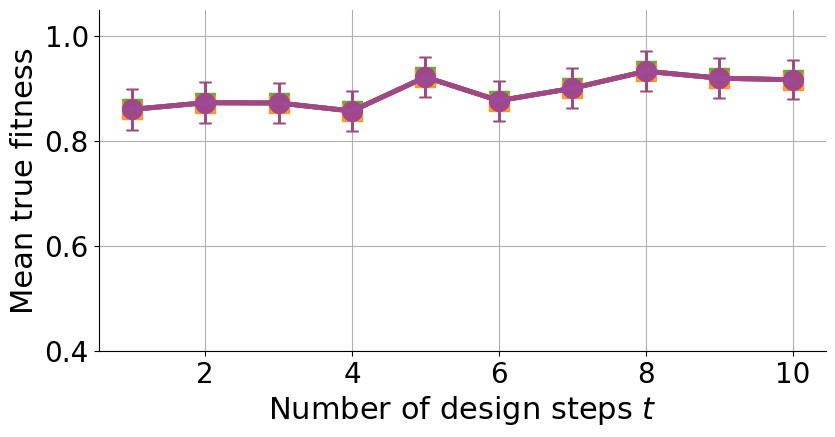

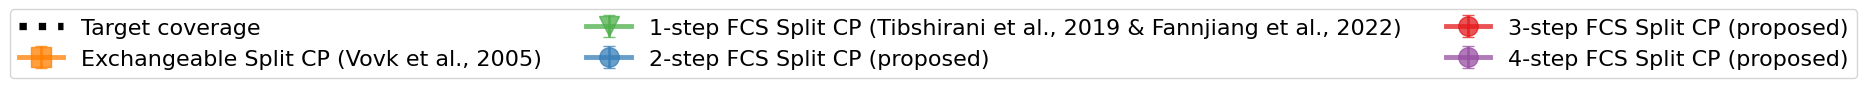

In [6]:
### Design experiments  
flur_color = 'blue'

plt.rc("axes.spines", top=False, right=False)
# avoid Type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

        

plt_legend = False

method_names = ['split', 'wsplit_1', 'wsplit_2', 'wsplit_3', 'wsplit_4'] #

CB_color_cycle = ['#ff7f00', '#4daf4a', '#377eb8',
                  '#e41a1c', '#984ea3', '#f781bf',  
                  '#999999', '#dede00', '#a65628']

data = pd.read_csv('./results/2024-03-27_SplitDesignExpts_'+flur_color+'_protein_NN_itrain64_steps16_nseed500_iseed0_tilt5.0_wAdjs1234_PIs_propTraini0.5_addTrainProb0.5_replaceTrue_noise0.1_BySeed_v2_fixed_250val.csv')
data_all = pd.read_csv('./results/2024-03-27_SplitDesignExpts_'+flur_color+'_protein_NN_itrain64_steps16_nseed500_iseed0_tilt5.0_wAdjs1234_PIs_propTraini0.5_addTrainProb0.5_replaceTrue_noise0.1_ALL_v2_fixed_250val.csv')


muh_name = 'NN'
ntrain = 192 ## 96, 192 ## 
K_str = '16'
metric = 'coverage'
n_seeds = 200
n_test = 1
lmbdas = [0, 1, 2, 3]
capsize=4

wid_q = 0.25
wid_e_color = 'gray'



## Plotting params
markersize=14
linewidth=3.5
transparency=0.75
linestyle_wid='--'
linestyle_fit='-.'
y_ax_label_size=22
x_ax_label_size=22
n_steps = 10
elinewidth=2

tick_sizes=20
suptitle_size=26


## Computing mean coverage
split_cov = data[data['method']=='split'].groupby(['step']).mean()['coverage']
split_cov_stderr = np.array(data[data['method']=='split'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

wsplit_cov_list = []
wsplit_cov_stderr_list = []
for i in range(1, len(method_names)):
    wsplit_cov_list.append(data[data['method']=='wsplit_' + str(i)].groupby(['step']).mean()['coverage'])
    wsplit_cov_stderr_list.append(np.array(data[data['method']=='wsplit_' + str(i)][['coverage', 'step']].groupby(['step']).std()/ np.sqrt(n_seeds)).T[0])


## Compute mean width
split_wid = data[data['method']=='split'].groupby(['step']).median()['width']
split_wid_stderr_l = np.array(split_wid) - np.array(data_all[data_all['method']=='split'][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0]
split_wid_stderr_u = np.array(data_all[data_all['method']=='split'][['width', 'step']].groupby(['step']).quantile(1 - wid_q)).T[0] - np.array(split_wid)

wsplit_wid_list = []
wsplit_wid_stderr_l_list = []
wsplit_wid_stderr_u_list = []
for i in range(1, len(method_names)):
    wsplit_wid_list.append(data[data['method']=='wsplit_' + str(i)].groupby(['step']).median()['width'])
    wsplit_wid_stderr_l_curr = np.array(wsplit_wid_list[-1]) - np.array(data_all[data_all['method']=='wsplit_' + str(i)][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0]
    wsplit_wid_stderr_l_curr = np.nan_to_num(wsplit_wid_stderr_l_curr, nan=-10.0, neginf=-10.0)
    wsplit_wid_stderr_l_list.append(wsplit_wid_stderr_l_curr) ## Aesthetic plotting adjustment, for when values are -infinite

    wsplit_wid_stderr_u_curr = np.array(data_all[data_all['method']=='wsplit_' + str(i)][['width', 'step']].groupby(['step']).quantile(1-wid_q)).T[0] - np.array(wsplit_wid_list[-1])
    wsplit_wid_stderr_u_curr = np.nan_to_num(wsplit_wid_stderr_u_curr, nan=10.0, posinf=10.0)
    wsplit_wid_stderr_u_list.append(wsplit_wid_stderr_u_curr) ## Aesthetic plotting adjustment, for when values are infinite


## Compute fitness
split_fitness = data_all[data_all['method']=='split'].groupby(['step']).mean()['y_test']
split_fitness_stderr = np.array(data_all[data_all['method']=='split'][['y_test', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

wsplit_fitness_list = []
wsplit_fitness_stderr_list = []
for i in range(1, len(method_names)):
    wsplit_fitness_list.append(data_all[data_all['method']=='wsplit_' + str(i)].groupby(['step']).mean()['y_test'])
    wsplit_fitness_stderr_list.append(np.array(data_all[data_all['method']=='wsplit_' + str(i)][['y_test', 'step']].groupby(['step']).std()/ np.sqrt(n_seeds)).T[0])

    

## Plotting

fig1, ax1 = plt.subplots(figsize=(8, 4))
fig1.tight_layout()

ax1.errorbar(range(1, n_steps+1), split_cov[0:n_steps], marker='s', yerr = split_cov_stderr[0:n_steps], ecolor = CB_color_cycle[0], label = 'Exchangeable Split CP (Vovk et al., 2005)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize,elinewidth=elinewidth)

for i in range(1, len(method_names)):
#     print(i)
    if (i == 1):
        ax1.errorbar(range(1, n_steps+1), wsplit_cov_list[i-1][0:n_steps], marker='v', yerr = wsplit_cov_stderr_list[i-1][0:n_steps], ecolor = CB_color_cycle[i], label = str(i)+'-step FCS Split CP (Tibshirani et al., 2019 & Fannjiang et al., 2022)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[i], capsize=capsize,elinewidth=elinewidth)
    else:
        ax1.errorbar(range(1, n_steps+1), wsplit_cov_list[i-1][0:n_steps], marker='o', yerr = wsplit_cov_stderr_list[i-1][0:n_steps], ecolor = CB_color_cycle[i], label = str(i)+'-step FCS Split CP (proposed)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[i], capsize=capsize,elinewidth=elinewidth)


ax1.axhline(y = 0.9, linestyle = ':', color = 'black', linewidth=1.5*linewidth, label='Target coverage')

handles, labels = ax1.get_legend_handles_labels()

ax1.set_ylabel('Mean coverage', fontsize=y_ax_label_size)
ax1.set_xlabel('Number of design steps $t$', fontsize=x_ax_label_size)
ax1.set_ylim([0.7,1.00000001])
ax1.set_yticks(np.arange(0.7, 1.00000001, 0.1))
ax1.tick_params(axis='both', labelsize=tick_sizes)
ax1.grid()

fig1.savefig('./results_figures/SplitCPDesignExpts_' + flur_color + '_lam5.0_coverage.pdf',bbox_inches='tight', dpi=300)



## Plot width
fig2, ax2 = plt.subplots(figsize=(8, 4))
fig2.tight_layout()

ax2.errorbar(range(1, n_steps+1), split_wid[0:n_steps], marker='s', yerr = np.vstack((split_wid_stderr_l[0:n_steps], split_wid_stderr_u[0:n_steps])), ecolor = CB_color_cycle[0], label = 'Exchangeable Split CP (Vovk et al., 2005)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize,elinewidth=elinewidth)
for i in range(1, len(method_names)):
    if (i == 1):
        ax2.errorbar(range(1, n_steps+1), wsplit_wid_list[i-1][0:n_steps], marker='v', yerr = np.vstack((wsplit_wid_stderr_l_list[i-1][0:n_steps], wsplit_wid_stderr_u_list[i-1][0:n_steps])), ecolor = CB_color_cycle[i], label = str(i)+'-step FCS Split CP (Tibshirani et al., 2019 & Fannjiang et al., 2022)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[i], capsize=capsize,elinewidth=elinewidth)
    else:
        ax2.errorbar(range(1, n_steps+1), wsplit_wid_list[i-1][0:n_steps], marker='o', yerr = np.vstack((wsplit_wid_stderr_l_list[i-1][0:n_steps], wsplit_wid_stderr_u_list[i-1][0:n_steps])), ecolor = CB_color_cycle[i], label = str(i)+'-step FCS Split CP (proposed)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[i], capsize=capsize,elinewidth=elinewidth)


ax2.set_ylabel('Median interval width', fontsize=y_ax_label_size)
ax2.set_xlabel('Number of design steps $t$', fontsize=x_ax_label_size)
ax2.set_ylim([0.0,2.3])
ax2.set_yticks(np.arange(0.0, 2.3, 0.5))
if (flur_color == 'red'):
    ax2.set_title('Red fluorescent protein design', y=1.025, fontsize=suptitle_size)
elif (flur_color == 'blue'):
    ax2.set_title('Blue fluorescent protein design', y=1.025, fontsize=suptitle_size)
ax2.tick_params(axis='both', labelsize=tick_sizes)
ax2.grid()

fig2.savefig('./results_figures/SplitCPDesignExpts_' + flur_color + '_lam5.0_width.pdf',bbox_inches='tight', dpi=300)



## Plot fitness
fig3, ax3 = plt.subplots(figsize=(8, 4))
fig3.tight_layout()

ax3.errorbar(range(1, n_steps+1), split_fitness[0:n_steps], marker='s', yerr = split_fitness_stderr[0:n_steps], ecolor = CB_color_cycle[0], label = 'Exchangeable Split CP (Vovk et al., 2005)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize,elinewidth=elinewidth)
for i in range(1, len(method_names)):
    if (i == 1):
        ax3.errorbar(range(1, n_steps+1), wsplit_fitness_list[i-1][0:n_steps], marker='v', yerr = wsplit_fitness_stderr_list[i-1][0:n_steps], ecolor = CB_color_cycle[i], label = str(i)+'-step FCS Split CP (Tibshirani et al., 2019 & Fannjiang et al., 2022)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[i], capsize=capsize,elinewidth=elinewidth)
    else:
        ax3.errorbar(range(1, n_steps+1), wsplit_fitness_list[i-1][0:n_steps], marker='o', yerr = wsplit_fitness_stderr_list[i-1][0:n_steps], ecolor = CB_color_cycle[i], label = str(i)+'-step FCS Split CP (proposed)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[i], capsize=capsize,elinewidth=elinewidth)


ax3.set_ylabel('Mean true fitness', fontsize=y_ax_label_size)
ax3.set_xlabel('Number of design steps $t$', fontsize=x_ax_label_size)
ax3.tick_params(axis='both', labelsize=tick_sizes)
ax3.set_ylim([0.4, 1.05])
ax3.grid()

fig3.savefig('./results_figures/SplitCPDesignExpts_' + flur_color + '_lam5.0_fitness.pdf',bbox_inches='tight', dpi=300)



## Plot legend
fig4, ax4 = plt.subplots(figsize=(0, 0))

ax4.set_xticks([])
ax4.set_yticks([])

order = list(range(0, len(method_names)+1))
ax4.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=[0.5,1.3],ncol=3,fontsize=16)

fig4.savefig('./results_figures/SplitCPDesignExpts_lam5.0_legend.pdf',bbox_inches='tight', dpi=300)

